**Problem Definition:**
1. Detect whether any table is present in a given image.
2. If table is present, extract the information present in that table.

In [ ]:
!wget --header="Host: doc-0o-3o-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_sdg3i7v4ri7e38pdfprsctq13ekkc1am_nonce=9k1fg6e75e9si" --header="Connection: keep-alive" "https://doc-0o-3o-docs.googleusercontent.com/docs/securesc/c7h9tlgpbqilf9nmomrdtg90qdn0nlc3/7in08ttkv9hfbivufmd8has7utle0s18/1625141250000/00048055783660299439/13937806133259344158/1Ms3h7oNoWZxR0nnW_1D_Vq9F254wqSXp?e=download&authuser=0&nonce=9k1fg6e75e9si&user=13937806133259344158&hash=oa78cisf6ve87d412qdn7e3vqjabam2e" -c -O 'Marmot_data.zip'

--2021-07-01 12:08:14--  https://doc-0o-3o-docs.googleusercontent.com/docs/securesc/c7h9tlgpbqilf9nmomrdtg90qdn0nlc3/7in08ttkv9hfbivufmd8has7utle0s18/1625141250000/00048055783660299439/13937806133259344158/1Ms3h7oNoWZxR0nnW_1D_Vq9F254wqSXp?e=download&authuser=0&nonce=9k1fg6e75e9si&user=13937806133259344158&hash=oa78cisf6ve87d412qdn7e3vqjabam2e
Resolving doc-0o-3o-docs.googleusercontent.com (doc-0o-3o-docs.googleusercontent.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to doc-0o-3o-docs.googleusercontent.com (doc-0o-3o-docs.googleusercontent.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘Marmot_data.zip’

Marmot_data.zip         [          <=>       ]  65.63M  27.9MB/s    in 2.4s    

2021-07-01 12:08:17 (27.9 MB/s) - ‘Marmot_data.zip’ saved [68820548]



In [ ]:
!unzip /content/Marmot_data.zip

In [ ]:
!mkdir marmot

In [ ]:
import os
import glob
#from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
from tqdm import tqdm
import xml.etree.ElementTree as ET
import tensorflow as tf

In [ ]:
!git clone https://github.com/mawanda-jun/TableTrainNet.git

Cloning into 'TableTrainNet'...
remote: Enumerating objects: 4268, done.
remote: Total 4268 (delta 0), reused 0 (delta 0), pack-reused 4268
Receiving objects: 100% (4268/4268), 1.85 GiB | 14.19 MiB/s, done.
Resolving deltas: 100% (1273/1273), done.
Checking out files: 100% (4147/4147), done.


**Dataset Sources:**


1.   Marmot Datset : https://drive.google.com/drive/folders/1QZiv5RKe3xlOBdTzuTVuYRxixemVIODp
2.   ICDAR Dataset : https://github.com/mawanda-jun/TableTrainNet/tree/master/dataset



Let us now check how many images and annotations are available in each dataset

In [ ]:
marmot_img = len(glob.glob1('/content',"*.bmp"))
print('No.of images in marmot dataset :', marmot_img)

No.of images in marmot dataset : 509


In [ ]:
marmot_ann = len(glob.glob1('/content',"*.xml"))
print('No.of annotations in marmot dataset :', marmot_ann)

No.of annotations in marmot dataset : 495


In [ ]:
icdar_img = len(glob.glob1('/content/TableTrainNet/dataset/Images',"*.bmp"))
print('No.of images in ICDAR dataset :', icdar_img)

No.of images in ICDAR dataset : 1600


In [ ]:
icdar_ann = len(glob.glob1('/content/TableTrainNet/dataset/Annotations',"*.xml"))
print('No.of annotations in ICDAR dataset :', icdar_ann)

No.of annotations in ICDAR dataset : 1600


The ICDAR dataset contains 1600 images in bmp format and corresponding annotations in xml format, whereas marmot dataset contains 509 images but only 495 annotations.

Let us now plot an image from the marmot dataset

Shape of the image is (1123, 793, 3)


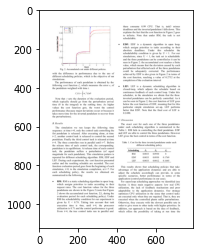

In [ ]:
img = plt.imread('/content/10.1.1.1.2006_3.bmp')
plt.imshow(img)
print('Shape of the image is',img.shape)
plt.show()

Let us now check the corresponding annotation

In [ ]:
#https://stackoverflow.com/questions/749796/pretty-printing-xml-in-python
import xml.dom.minidom
with open('/content/10.1.1.1.2006_3.xml') as xml_file:
  dom = xml.dom.minidom.parseString(xml_file.read()) # or xml.dom.minidom.parseString(xml_string)
  pretty_xml_as_string = dom.toprettyxml()
print(pretty_xml_as_string)

<?xml version="1.0" ?>
<annotation verified="yes">
	
	
	<folder>MARMOT_ANNOTATION</folder>
	
	
	<filename>10.1.1.1.2006_3.bmp</filename>
	
	
	<path>/home/monika/Desktop/MARMOT_ANNOTATION/10.1.1.1.2006_3.bmp</path>
	
	
	<source>
		
		
		<database>Unknown</database>
		
	
	</source>
	
	
	<size>
		
		
		<width>793</width>
		
		
		<height>1123</height>
		
		
		<depth>3</depth>
		
	
	</size>
	
	
	<segmented>0</segmented>
	
	
	<object>
		
		
		<name>column</name>
		
		
		<pose>Unspecified</pose>
		
		
		<truncated>0</truncated>
		
		
		<difficult>0</difficult>
		
		
		<bndbox>
			
			
			<xmin>458</xmin>
			
			
			<ymin>710</ymin>
			
			
			<xmax>517</xmax>
			
			
			<ymax>785</ymax>
			
		
		</bndbox>
		
	
	</object>
	
	
	<object>
		
		
		<name>column</name>
		
		
		<pose>Unspecified</pose>
		
		
		<truncated>0</truncated>
		
		
		<difficult>0</difficult>
		
		
		<bndbox>
			
			
			<xmin>531</xmin>
			
			
			<ymin>710</ymin>
			
			
			<xmax>568</xmax>
			
			
			<ymax>783</ymax>
			
		

The above image we plotted contains a table with four columns. So the xml file has four sets of <xmin,ymin,xmax,ymax>, each representing a column in the table.

Let us now try to plot a single column from the table.

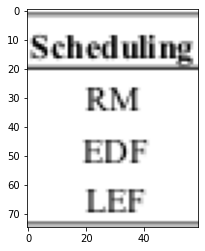

In [ ]:
img = Image.open('/content/10.1.1.1.2006_3.bmp')
bound_box = (int(458),int(710),int(517),int(785))
column = img.crop(bound_box)
imgplot = plt.imshow(column)

So now to find the top left and bottom right point of the table we need to calculate the min and max points from all the points given.

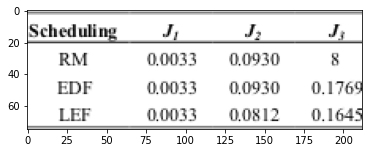

In [ ]:
img = Image.open('/content/10.1.1.1.2006_3.bmp')
xmin = min(458, 710, 517, 785)
ymin = min(710,710,712,712)
xmax = max(517,568,619,670)
ymax = max(785,783,785,784)
bound_box = (int(xmin),int(ymin),int(xmax),int(ymax))
table = img.crop(bound_box)
imgplot = plt.imshow(table)

In the research paper, all the images are reshaped to 1024*1024. So we need to change the cordinated of bounding box acordingly by multiplying with the scale factor.


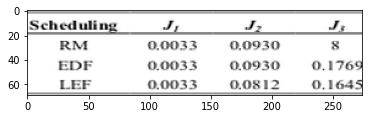

In [ ]:
#https://stackoverflow.com/questions/49466033/resizing-image-and-its-bounding-box

img = Image.open('/content/10.1.1.1.2006_3.bmp')
img_resize = img.resize((1024,1024), Image.ANTIALIAS)

x_scale_factor = 1024/img.size[0]
y_scale_factor = 1024/img.size[1]

xmin=min(458,531,583,637)
ymin=min(710,710,712,712)
xmax=max(517,568,619,670)
ymax=max(785,783,785,784)

xmin=np.round(xmin*x_scale_factor)
xmax=np.round(xmax*x_scale_factor)
ymin=np.round(ymin*y_scale_factor)
ymax=np.round(ymax*y_scale_factor)

bound_box = (int(xmin),int(ymin),int(xmax),int(ymax))

table = img_resize.crop(bound_box)
imgplot = plt.imshow(table)

Let us now try to plot the table mask.

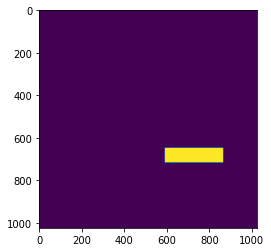

In [ ]:
#https://stackoverflow.com/questions/64195636/converting-bounding-box-regions-into-masks-and-saving-them-as-png-files
img = Image.open('/content/10.1.1.1.2006_3.bmp')
img_resize = img.resize((1024,1024), Image.ANTIALIAS)

x_scale_factor = 1024/img.size[0]
y_scale_factor = 1024/img.size[1]

xmin=min(458,531,583,637)
ymin=min(710,710,712,712)
xmax=max(517,568,619,670)
ymax=max(785,783,785,784)

xmin=np.round(xmin*x_scale_factor)
xmax=np.round(xmax*x_scale_factor)
ymin=np.round(ymin*y_scale_factor)
ymax=np.round(ymax*y_scale_factor)

mask = np.zeros((1024,1024), dtype = np.uint8)
mask[int(ymin):int(ymax),int(xmin):int(xmax)] = 255
mask_img = Image.fromarray(mask, 'L')

plt.imshow(mask_img)

Lets now plot the column mask

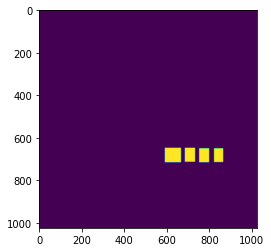

In [ ]:
img = Image.open('/content/10.1.1.1.2006_3.bmp')
img_resize = img.resize((1024,1024), Image.ANTIALIAS)

x_scale_factor = 1024/img.size[0]
y_scale_factor = 1024/img.size[1]

mask = np.zeros((1024,1024), dtype = np.uint8)
xmin=[458,531,583,637]
ymin=[710,710,712,712]
xmax=[517,568,619,670]
ymax=[785,783,785,784]

xmin = [x*x_scale_factor for x in xmin]
ymin = [y*y_scale_factor for y in ymin]
xmax = [x*x_scale_factor for x in xmax]
ymax = [y*y_scale_factor for y in ymax]

for l in range(len(xmin)):
  mask[int(ymin[l]):int(ymax[l]), int(xmin[l]):int(xmax[l])] = 255
mask_img = Image.fromarray(mask, 'L')

plt.imshow(mask_img)

Let us now do the above steps for a data in ICDAR dataset.

Shape of the image is (1373, 1061, 3)


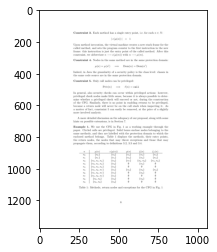

In [ ]:
img = plt.imread('/content/TableTrainNet/dataset/Images/POD_0007.bmp')
plt.imshow(img)
print('Shape of the image is',img.shape)
plt.show()

In [ ]:
with open('/content/TableTrainNet/dataset/Annotations/POD_0007.xml') as xml_file:
  dom = xml.dom.minidom.parseString(xml_file.read()) # or xml.dom.minidom.parseString(xml_string)
  pretty_xml_as_string = dom.toprettyxml()
print(pretty_xml_as_string)

<?xml version="1.0" ?>
<document filename="POD_0007.xml">
	
	
	<formulaRegion>
		
		
		<Coords points="455,173 574,173 455,192 574,192"/>
		
	
	</formulaRegion>
	
	
	<formulaRegion>
		
		
		<Coords points="351,344 674,344 351,364 674,364"/>
		
	
	</formulaRegion>
	
	
	<formulaRegion>
		
		
		<Coords points="400,475 626,475 400,494 626,494"/>
		
	
	</formulaRegion>
	
	
	<tableRegion>
		
		
		<Coords points="253,881 774,881 253,1092 774,1092"/>
		
	
	</tableRegion>
	

</document>



The ICDAR Datset contains annotations only for table cordinates unlike Marmot datset which is annotated for both table and column cordinates.

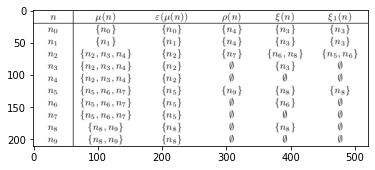

In [ ]:
img = Image.open('/content/TableTrainNet/dataset/Images/POD_0007.bmp')
xmin = 253
ymin = 881
xmax = 774
ymax = 1092
bound_box = (int(xmin),int(ymin),int(xmax),int(ymax))
table = img.crop(bound_box)
imgplot = plt.imshow(table)

In [ ]:
img.size

(1061, 1373)

In [ ]:
mask = np.zeros((1373,1061), dtype = np.uint8)
mask[int(ymin):int(ymax),int(xmin):int(xmax)] = 255
mask_img = Image.fromarray(mask, 'L')

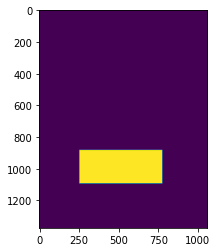

In [ ]:
plt.imshow(mask_img)

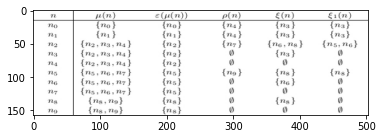

In [ ]:
img = Image.open('/content/TableTrainNet/dataset/Images/POD_0007.bmp')
img_resize = img.resize((1024,1024), Image.ANTIALIAS)

x_scale_factor = 1024/img.size[0]
y_scale_factor = 1024/img.size[1]

xmin = 253
ymin = 881
xmax = 774
ymax = 1092

xmin=np.round(xmin*x_scale_factor)
xmax=np.round(xmax*x_scale_factor)
ymin=np.round(ymin*y_scale_factor)
ymax=np.round(ymax*y_scale_factor)

bound_box = (int(xmin),int(ymin),int(xmax),int(ymax))

table = img_resize.crop(bound_box)
imgplot = plt.imshow(table)

In [ ]:
mask = np.zeros((1024,1024), dtype = np.uint8)
mask[int(ymin):int(ymax),int(xmin):int(xmax)] = 255
mask_img = Image.fromarray(mask, 'L')

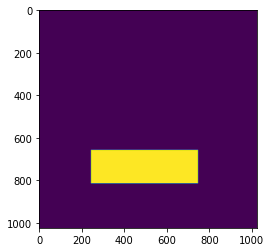

In [ ]:
plt.imshow(mask_img)

Let us now create dataframes for both the dataset containing the informations parsed from the xml file. 

In [ ]:
!mkdir marmot

In [ ]:
!mkdir marmot/images

In [ ]:
filename_list = []
target_size = 256
xmin = []
xmax = []
ymin = []
ymax = []
for filename in tqdm(sorted(glob.glob1('/content',"*.xml"))):
  tree = ET.parse(filename)
  root = tree.getroot()
  name = root.find('./filename').text
  width = int(root.find('./size/width').text)
  height = int(root.find('./size/height').text)
  depth = int(root.find('./size/depth').text)
  x_scale_factor = target_size/width
  y_scale_factor = target_size/height

  img = Image.open(os.path.join('/content', name))
  img = img.resize((256,256), Image.ANTIALIAS)
  img.save('/content/marmot/images/' + name[:-4] + '.jpg')

  for x in root.findall('./object/bndbox/xmin'):
    xmin.append(np.round(int(x.text)*x_scale_factor).astype(int))
  for x in root.findall('./object/bndbox/xmax'):
    xmax.append(np.round(int(x.text)*x_scale_factor).astype(int))
  for y in root.findall('./object/bndbox/ymin'):
    ymin.append(np.round(int(y.text)*y_scale_factor).astype(int))
  for y in root.findall('./object/bndbox/ymax'):
    ymax.append(np.round(int(y.text)*y_scale_factor).astype(int))

  for l in range(len(root.findall('./object/bndbox/xmin'))):
    filename_list.append('/content/marmot/images/' + name[:-4] + '.jpg')
df_dict = {'filename':filename_list, 'xmin':xmin, 'ymin':ymin, 'xmax':xmax, 'ymax':ymax}
df_marmot = pd.DataFrame.from_dict(df_dict)

100%|██████████| 495/495 [00:10<00:00, 48.06it/s]


In [ ]:
df_marmot.head()

,filename,xmin,ymin,xmax,ymax
0,/content/marmot/images/10.1.1.1.2006_3.jpg,148,162,167,179
1,/content/marmot/images/10.1.1.1.2006_3.jpg,171,162,183,178
2,/content/marmot/images/10.1.1.1.2006_3.jpg,188,162,200,179
3,/content/marmot/images/10.1.1.1.2006_3.jpg,206,162,216,179
4,/content/marmot/images/10.1.1.1.2013_63.jpg,37,46,90,186


Let us now create dataframe for ICDAR Data.

In [ ]:
!mkdir icdar

In [ ]:
!mkdir icdar/images

In [ ]:
filename_list = []
xmin = []
xmax = []
ymin = []
ymax = []
target_size = 1024
table_present = []
for filename in tqdm(sorted(glob.glob1('/content/TableTrainNet/dataset/Annotations',"*.xml"))):
  #print(filename)
  img = Image.open('/content/TableTrainNet/dataset/Images/' + filename[:-4] + '.bmp')
  width = img.size[0]
  height = img.size[1]
  img = img.resize((1024,1024), Image.ANTIALIAS)
  img.save('/content/icdar/images/' + filename[:-4] + '.jpg')
  tree = ET.parse('/content/TableTrainNet/dataset/Annotations/' + filename)
  root = tree.getroot()
  #check if table is present
  if root.findall('./tableRegion'):
    table_exist = 'Y'
    x_scale_factor = target_size/width
    y_scale_factor = target_size/height
    coords = root.findall('./tableRegion/Coords')
    for c in range(len(coords)):
      point = coords[c].get('points')
      points = point.split(',')
      xmin.append(np.round(int(points[0])*x_scale_factor))
      ymax.append(np.round(int(points[-1])*y_scale_factor))
      a = points[1].split(' ')
      ymin.append(np.round(int(a[0])*y_scale_factor))
      xmax.append(np.round(int(a[1])*x_scale_factor))
      filename_list.append('/content/icdar/images/' + filename[:-4] + '.jpg')
      table_present.append(table_exist)
  else:
    table_exist = 'N'
    xmin.append(0)
    ymin.append(0)
    xmax.append(0)
    ymax.append(0)
    filename_list.append('/content/icdar/images/' + filename[:-4] + '.jpg')
    table_present.append(table_exist)

dict_df = {'filename':filename_list,'table_present':table_present, 'xmin':xmin, 'ymin' : ymin, 'xmax':xmax, 'ymax':ymax}
df_icdar = pd.DataFrame.from_dict(dict_df)

 14%|█▍        | 220/1600 [00:21<02:15, 10.21it/s]

KeyboardInterrupt: ignored

In [ ]:
df_icdar.head()

,filename,table_present,xmin,ymin,xmax,ymax
0,/content/icdar/images/POD_0000.jpg,N,0.0,0.0,0.0,0.0
1,/content/icdar/images/POD_0001.jpg,Y,614.0,819.0,853.0,929.0
2,/content/icdar/images/POD_0002.jpg,N,0.0,0.0,0.0,0.0
3,/content/icdar/images/POD_0003.jpg,Y,161.0,230.0,862.0,344.0
4,/content/icdar/images/POD_0003.jpg,Y,264.0,538.0,759.0,740.0


In [ ]:
df_icdar.shape

(1750, 6)

Let us now draw the mask using these dataframes and save them.



In [ ]:
!mkdir marmot/table_mask
!mkdir marmot/column_mask

In [ ]:
for files in df_marmot['filename'].unique():
  xmin = df_marmot[df_marmot['filename'] == files]['xmin'].tolist()
  ymin = df_marmot[df_marmot['filename'] == files]['ymin'].tolist()
  xmax = df_marmot[df_marmot['filename'] == files]['xmax'].tolist()
  ymax = df_marmot[df_marmot['filename'] == files]['ymax'].tolist()

  col_mask = np.zeros((256,256), dtype = np.uint8)
  tab_mask = np.zeros((256,256), dtype = np.uint8)

  for k in range(len(xmin)):
    col_mask[ymin[k]:ymax[k],xmin[k]:xmax[k]] = 255
  tab_mask[min(ymin):max(ymax), min(xmin):max(xmax)] = 255

  col_mask_img = Image.fromarray(col_mask, 'L')
  tab_mask_img = Image.fromarray(tab_mask, 'L')

  col_mask_img.save('/content/marmot/column_mask/' + files.split('/')[-1])
  tab_mask_img.save('/content/marmot/table_mask/' + files.split('/')[-1])

In [ ]:
!mkdir icdar/table_mask

In [ ]:
for files in df_icdar['filename'].unique():
  xmin = df_icdar[df_icdar['filename'] == files]['xmin'].tolist()
  ymin = df_icdar[df_icdar['filename'] == files]['ymin'].tolist()
  xmax = df_icdar[df_icdar['filename'] == files]['xmax'].tolist()
  ymax = df_icdar[df_icdar['filename'] == files]['ymax'].tolist()

  tab_mask = np.zeros((1024,1024), dtype = np.uint8)
  for k in range(len(xmin)):
    tab_mask[int(ymin[k]):int(ymax[k]),int(xmin[k]):int(xmax[k])] = 255
  tab_mask_img = Image.fromarray(tab_mask, 'L')
  tab_mask_img.save('/content/icdar/table_mask/' + files.split('/')[-1])

Let us now try plotting some random datapoints.

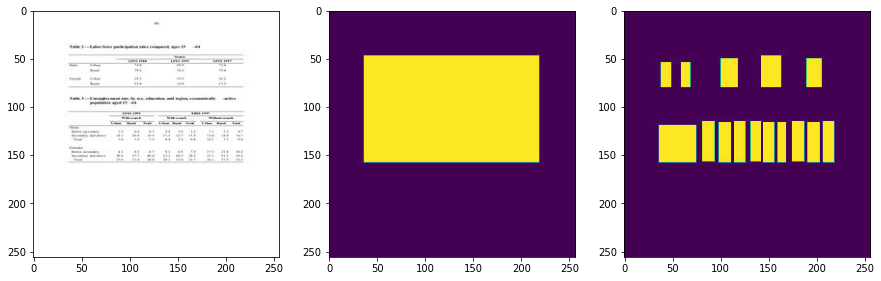

In [ ]:
files = df_marmot.iloc[20]['filename']
img = Image.open(files)
table_mask = Image.open('/content/marmot/table_mask/' + files.split('/')[-1])
column_mask = Image.open('/content/marmot/column_mask/' + files.split('/')[-1])
#plt.figure(figsize=(150, 20))
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15,15))
ax1.imshow(img)
ax2.imshow(table_mask) 
ax3.imshow(column_mask)

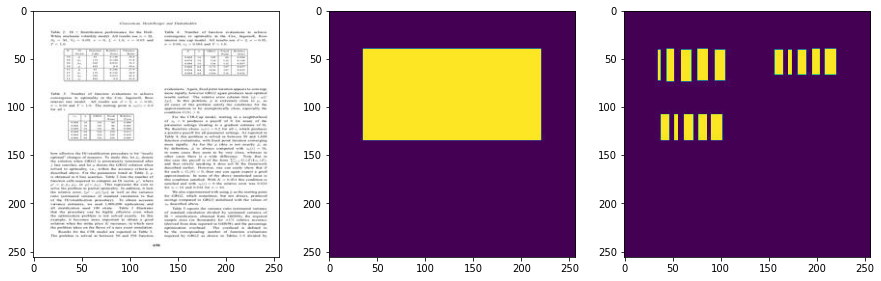

In [ ]:
files = df_marmot.iloc[250]['filename']
img = Image.open(files)
table_mask = Image.open('/content/marmot/table_mask/' + files.split('/')[-1])
column_mask = Image.open('/content/marmot/column_mask/' + files.split('/')[-1])
#plt.figure(figsize=(150, 20))
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15,15))
ax1.imshow(img)
ax2.imshow(table_mask) 
ax3.imshow(column_mask)

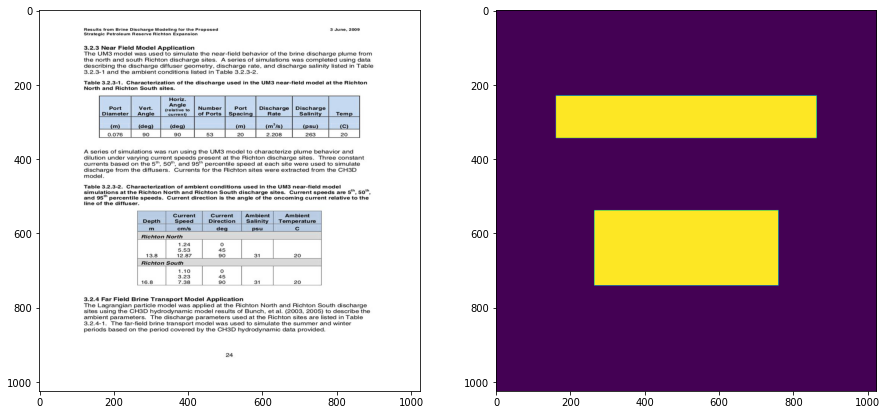

In [ ]:
files = df_icdar.iloc[3]['filename']
img = Image.open(files)
table_mask = Image.open('/content/icdar/table_mask/' + files.split('/')[-1])
#plt.figure(figsize=(150, 20))
fig,(ax1,ax2) = plt.subplots(1,2, figsize = (15,15))
ax1.imshow(img)
ax2.imshow(table_mask) 

The xml files containing the annotations where parsed and the mask images are now created succesfully.

In [ ]:
!zip -r /content/marmot_256.zip /content/marmot

In [ ]:
from google.colab import files
files.download("/content/marmot_256.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model Architecture:

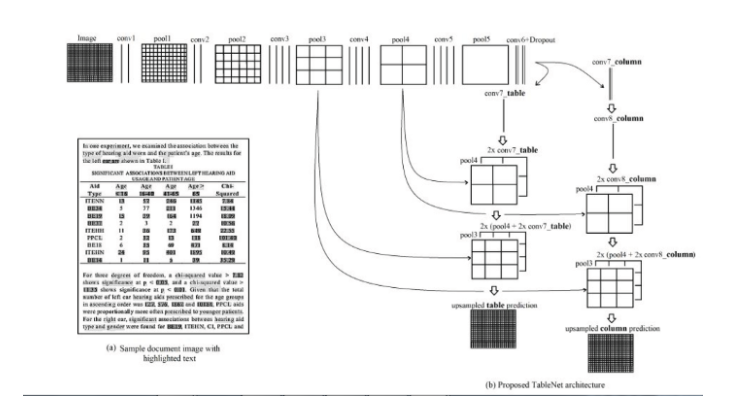





1. The model uses VGG-19 as the base network.
2. The fully connected layers of the VGG-19 is replaced by two (1*1) convolutional layer with ReLU activation followed by a dropout layer having probability of 0.8 (The VGG network along with two convolutional layers form the encoder part of the network)
3. After this two different branches of the decoder network are appended for both table and column regions.
4. The output of the encoder layer is distributed to both decoder branches.
5. The table branch of the decoder contains a (1*1) convolution layer followed by upscaling.
6. The upscaled output is then concatenated with pool4 pooling layer of VGG 19.
7. The combined feature map is agin upscaled and concatenated with pool3 pooling layer of VGG 19.
8. The final feature map is upscaled to meet the original image dimension.
9. The column branch of the decoder contains a (1*1) convolutional layer with ReLU activation followed by a dropout layer with probability 0.8.
10. The output is then upsampled after passing through a (1*1) convolutional layer.
11. The upsampled feature map is concatenated with pool4 pooling layer of VGG19. The concated feature map is upsampled and concatenated with pool3 pooling layer of VGG 19.
12. The final feature map is upscaled to meet original image dimension.

In [ ]:
#https://github.com/jainammm/TableNet/blob/master/TableNet.pdf
#https://www.tensorflow.org/tutorials/images/segmentation
list_images = tf.data.Dataset.list_files('/content/marmot/images/*.jpg')

In [ ]:
def process(file_path):
  img = tf.io.read_file(file_path)
  img = tf.image.decode_jpeg(img)
  column_mask_path = tf.strings.regex_replace(file_path, 'images', 'column_mask')
  column_mask = tf.io.read_file(column_mask_path)
  column_mask = tf.image.decode_jpeg(column_mask)
  column_mask = tf.cast(column_mask, tf.float32)/255.0
  table_mask_path = tf.strings.regex_replace(file_path, 'images', 'table_mask')
  table_mask = tf.io.read_file(table_mask_path)
  table_mask = tf.image.decode_jpeg(table_mask)
  table_mask = tf.cast(table_mask, tf.float32)/255.0
  return img, {'table_mask': table_mask, 'column_mask': column_mask}

In [ ]:
DATA_SIZE = len(list(list_images))
train_size = int(0.9*DATA_SIZE)

train = list_images.take(train_size)
validation = list_images.skip(train_size)

TRAIN_SIZE = len(list(train))
VALIDATION_SIZE = len(list(validation))
BUFFER_SIZE = 1000
BATCH_SIZE = 3
STEPS_PER_EPOCH = TRAIN_SIZE//BATCH_SIZE

train = train.shuffle(BUFFER_SIZE)

In [ ]:
train = train.map(process, num_parallel_calls=tf.data.experimental.AUTOTUNE)
validation = validation.map(process)

In [ ]:
train_data = train.batch(BATCH_SIZE).prefetch(buffer_size=1)
validation_data = validation.batch(BATCH_SIZE).prefetch(buffer_size=1)

In [ ]:
#https://www.tensorflow.org/tutorials/images/segmentation
def display(display_list):
    
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'Table Mask', 'Column Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

(256, 256, 3)


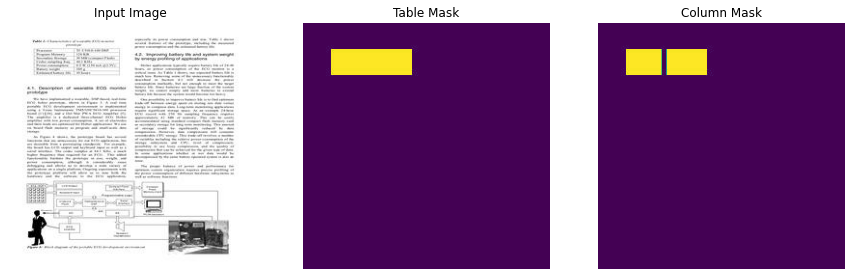

(256, 256, 3)


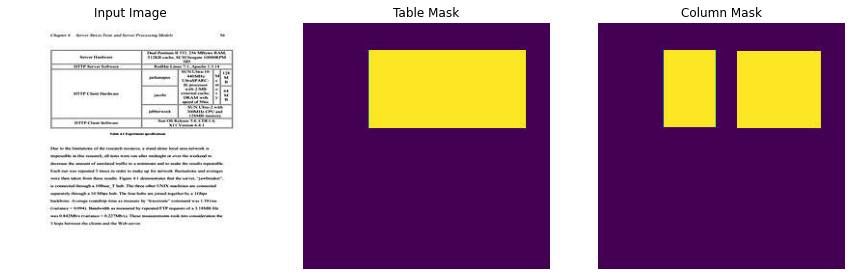

(256, 256, 3)


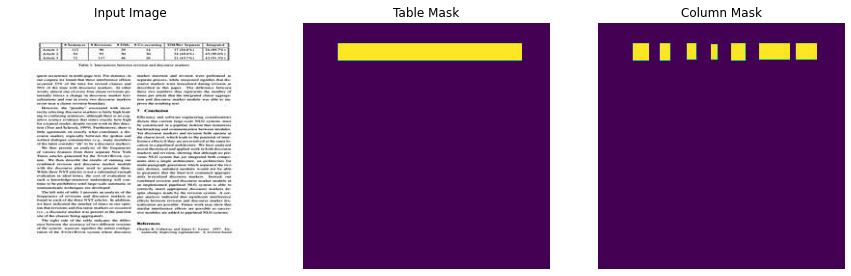

In [ ]:
for image, mask  in train.take(3):
    print(image.shape)
    display([image, mask['table_mask'], mask['column_mask']])

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Dropout, Dense, Flatten, Input, Concatenate, UpSampling2D, Conv2DTranspose

In [ ]:
def table_decoder(x, vgg19_pool3, vgg19_pool4):
  x = Conv2D(512, (1,1), activation = 'relu', name = 'conv7_table')(x)
  x = UpSampling2D((2,2), name = '2xconv7_table')(x)
  x = Concatenate()([x,vgg19_pool4])
  x = UpSampling2D((2,2), name = '2x_pool4_2xconv7_table')(x)
  x = Concatenate()([x, vgg19_pool3])
  x = UpSampling2D(size=(2,2))(x)
  x = UpSampling2D(size=(2,2))(x)
  x =  Conv2DTranspose(3,3, strides= 2 , padding = 'same', name = 'table_mask')(x)
  return x

In [ ]:
def column_decoder(x, vgg19_pool3, vgg19_pool4):
  x = Conv2D(512, (1,1), activation='relu', name = 'conv7_column')(x)
  x = Dropout(0.8)(x)
  x = Conv2D(512, (1,1), activation='relu', name = 'conv8_column')(x)
  x = UpSampling2D((2,2), name = '2xconv8_column')(x)
  x = Concatenate()([x, vgg19_pool4])
  x = UpSampling2D((2,2), name = '2x_pool4_2xconv8_column')(x)
  x = Concatenate()([x, vgg19_pool3])
  x = UpSampling2D(size=(2,2))(x)
  x = UpSampling2D(size=(2,2))(x)
  x =  Conv2DTranspose(3,3, strides=2, padding = 'same', name = 'column_mask')(x)
  return x

In [ ]:
tf.keras.backend.clear_session()
input = Input((256,256,3), name = 'input')
vgg_19 = tf.keras.applications.VGG19(include_top=False, weights = 'imagenet', input_tensor=input)
print(f'VGG19 ouput shape :{vgg_19.output_shape}')
vgg19_pool3 = vgg_19.get_layer('block3_pool').output
print(f'VGG19 pool3 layer output shape : {vgg19_pool3.shape}')
vgg19_pool4 = vgg_19.get_layer('block4_pool').output
print(f'VGG19 pool4 layer output shape : {vgg19_pool4.shape}')

x = Conv2D(512, (1,1), activation='relu', name = 'block6_conv1')(vgg_19.output)
x = Dropout(0.8)(x)
x = Conv2D(512, (1,1), activation='relu', name = 'block6_conv2')(x)
x = Dropout(0.8)(x)
print(f'Shape of encoder output: {x.shape}')

VGG19 ouput shape :(None, 8, 8, 512)
VGG19 pool3 layer output shape : (None, 32, 32, 256)
VGG19 pool4 layer output shape : (None, 16, 16, 512)
Shape of encoder output: (None, 8, 8, 512)


In [ ]:
table_mask = table_decoder(x, vgg19_pool3, vgg19_pool4)
column_mask = column_decoder(x, vgg19_pool3, vgg19_pool4)

In [ ]:
model =  Model(inputs = input, outputs = [table_mask, column_mask], name = 'tablenet')

In [ ]:
losses = {
    "table_mask": tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    "column_mask": tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
}

lossWeights = {"table_mask": 1.0, "column_mask": 1.0}

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, epsilon=1e-08),
              loss=losses,
              metrics=['accuracy'],
              loss_weights=lossWeights)

In [ ]:
EPOCHS = 3
VALIDATION_STEPS = VALIDATION_SIZE//BATCH_SIZE


model_history = model.fit(train_data, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=validation_data)

Epoch 1/3
148/148 [==============================] - 68s 414ms/step - loss: 67.0353 - table_mask_loss: 34.5136 - column_mask_loss: 32.5217 - table_mask_accuracy: 0.8099 - column_mask_accuracy: 0.9024 - val_loss: 0.9716 - val_table_mask_loss: 0.6188 - val_column_mask_loss: 0.3528 - val_table_mask_accuracy: 0.9256 - val_column_mask_accuracy: 0.9622
Epoch 2/3
148/148 [==============================] - 61s 410ms/step - loss: 0.8126 - table_mask_loss: 0.4745 - column_mask_loss: 0.3381 - table_mask_accuracy: 0.8263 - column_mask_accuracy: 0.9467 - val_loss: 0.5626 - val_table_mask_loss: 0.3551 - val_column_mask_loss: 0.2076 - val_table_mask_accuracy: 0.8926 - val_column_mask_accuracy: 0.9883
Epoch 3/3
148/148 [==============================] - 61s 409ms/step - loss: 0.5914 - table_mask_loss: 0.3485 - column_mask_loss: 0.2429 - table_mask_accuracy: 0.8479 - column_mask_accuracy: 0.9583 - val_loss: 0.6074 - val_table_mask_loss: 0.3534 - val_column_mask_loss: 0.2541 - val_table_mask_accuracy: 0

In [ ]:
def display_predictions(sample_image):
  for img, (tab_mask, col_mask) in sample_image:
    pred_tabmask, pred_colmask = model.predict(img, verbose=1)
    pred_tabmask = tf.argmax(pred_tabmask, axis=-1)
    pred_tabmask = pred_tabmask[..., tf.newaxis]
    pred_colmask = tf.argmax(pred_colmask, axis=-1)
    pred_colmask = pred_colmask[..., tf.newaxis]
    pred_table_mask = pred_tabmask[0]
    pred_column_mask = pred_colmask[0]
    display([img[0], pred_table_mask, pred_column_mask])

In [ ]:
sample_image = validation_data.take(1)

In [ ]:
class ShowPredictionCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = None):
    if epoch % 2 == 0:
      display_predictions(sample_image)
      print(f'Predicted mask after epoch {epoch}') 

Epoch 1/4
1/1 [==============================] - 0s 475ms/step


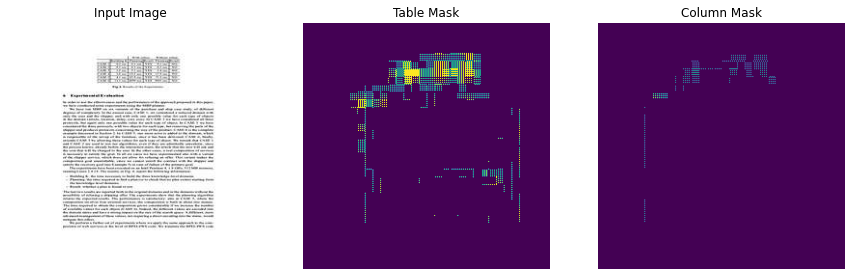

Predicted mask after epoch 0
Epoch 2/4
 30/148 [=====>........................] - ETA: 46s - loss: 0.8354 - table_mask_loss: 0.4697 - column_mask_loss: 0.3657 - table_mask_accuracy: 0.8275 - column_mask_accuracy: 0.9426

KeyboardInterrupt: ignored

In [ ]:
EPOCHS = 4
VALIDATION_STEPS = VALIDATION_SIZE//BATCH_SIZE


model_history = model.fit(train_data, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=validation_data, callbacks = [ShowPredictionCallback()])